In [1]:
import pandas as pd   # data processing

import matplotlib.pyplot as plt # data visualization
import seaborn as sns # advanced data visualization

from sklearn.model_selection import train_test_split # split data into train and test
from sklearn.preprocessing import MinMaxScaler # scale the data between 0 - 1
from tensorflow.keras.models import Sequential # initiate the mode 
from tensorflow.keras.layers import Dense, Activation, Dropout # add the layers
from tensorflow.keras.optimizers import Adam # optimizer 

import numpy as np
from sklearn.metrics import classification_report,confusion_matrix # Model Evaluation 

In [2]:
df= pd.read_csv("breastcancer.csv")
df

,ID,Clump Thickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
df.drop("ID", axis=1, inplace=True)

In [4]:
df.dtypes

Clump Thickness                 int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [5]:
df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [6]:
df['Bare Nuclei']=df['Bare Nuclei'].replace("?",df['Bare Nuclei'].mode()[0])   #replacing the "?" with the mode
df['Bare Nuclei']=df['Bare Nuclei'].astype(int)

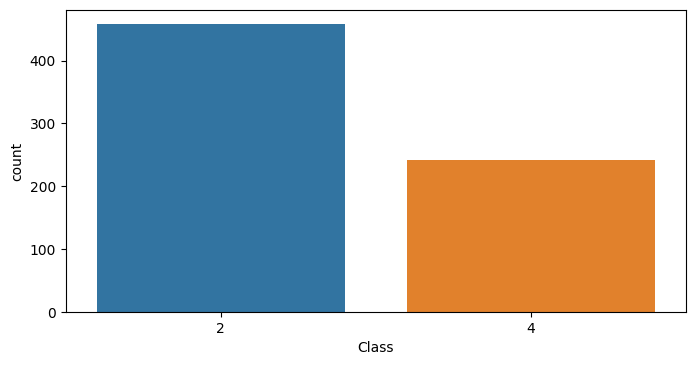

In [7]:
# count plot of the class
plt.figure(figsize = (8, 4), dpi = 100)
sns.countplot(data = df, x = 'Class')
plt.show()

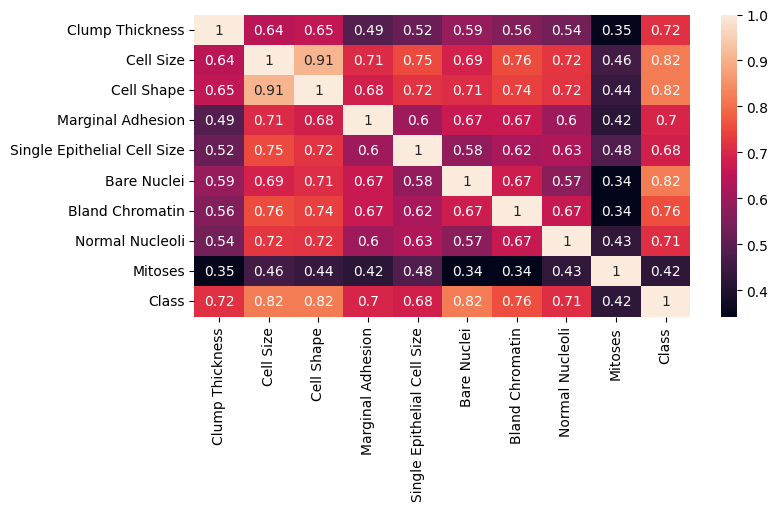

In [8]:
# correlation analysis using heatmap
plt.figure(figsize = (8, 4), dpi = 100)
sns.heatmap(df.corr(), annot=True);

### Model Building


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
# seprate X and y
X = df.drop('Class', axis = 1).values
y = df['Class'].values

In [11]:
lb= LabelEncoder()
y= lb.fit_transform(y)

In [12]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8,random_state=20)    #80% training data and 20% testing

In [13]:
# build model architecture
model = Sequential()
model.add(Dense(30,activation='relu', input_shape=(9,)))   
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                300       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 781
Trainable params: 781
Non-trainable params: 0
_________________________________________________________________


In [15]:
# fit the model
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,verbose=1)

Epoch 1/50
5/5 [==============================] - 1s 77ms/step - loss: 0.8088 - accuracy: 0.3165 - val_loss: 0.7867 - val_accuracy: 0.3304
Epoch 2/50
5/5 [==============================] - 0s 18ms/step - loss: 0.7379 - accuracy: 0.3525 - val_loss: 0.7380 - val_accuracy: 0.3429
Epoch 3/50
5/5 [==============================] - 0s 17ms/step - loss: 0.6837 - accuracy: 0.3741 - val_loss: 0.6873 - val_accuracy: 0.3554
Epoch 4/50
5/5 [==============================] - 0s 17ms/step - loss: 0.6405 - accuracy: 0.4173 - val_loss: 0.6450 - val_accuracy: 0.4857
Epoch 5/50
5/5 [==============================] - 0s 17ms/step - loss: 0.6015 - accuracy: 0.5468 - val_loss: 0.6119 - val_accuracy: 0.5750
Epoch 6/50
5/5 [==============================] - 0s 17ms/step - loss: 0.5695 - accuracy: 0.6619 - val_loss: 0.5833 - val_accuracy: 0.6857
Epoch 7/50
5/5 [==============================] - 0s 18ms/step - loss: 0.5384 - accuracy: 0.7554 - val_loss: 0.5595 - val_accuracy: 0.7464
Epoch 8/50
5/5 [===========

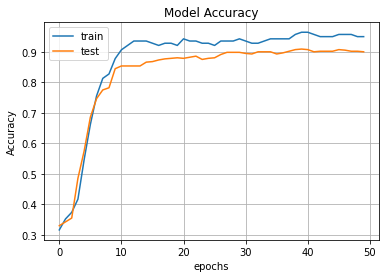

In [16]:
#Summarize model Accuracy

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.legend(['train', 'test'])
plt.grid()
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.show()

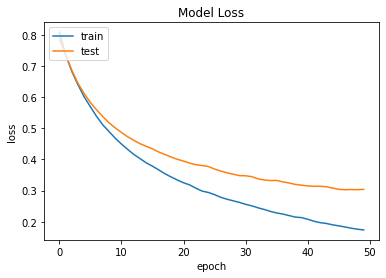

In [17]:
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
#predictions
pred= model.predict(X_test)


#Generate the confusion matrix
#matrix = metrics.confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1))

#y_pred = np.argmax(pred, axis=1)
y_pred= pred.astype(int)

In [19]:
cf_matrix= confusion_matrix(y_test,y_pred)
print(cf_matrix)

[[370   0]
 [190   0]]


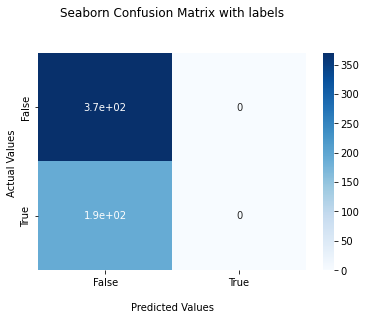

In [20]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [21]:
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [22]:
# Create function returning a compiled network
def create_network():
    
    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=30, activation='relu', input_shape=(9,)))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=15, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='adam', # Root Mean Square Propagation
                    metrics=['accuracy']) # Accuracy performance metric
    
    
    # Return compiled network
    return network

In [23]:
# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=50, 
                                 verbose=0)

C:\Users\Pro-Tech\AppData\Local\Temp/ipykernel_10300/1718090258.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  neural_network = KerasClassifier(build_fn=create_network,


In [24]:
# Evaluate neural network using three-fold cross-validation
cross_val_score(neural_network, X, y, cv=4)


array([0.88      , 0.94285715, 0.97714287, 0.98850572])